In [1]:
# Import all necessary python packages

import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing the dataset
df = pd.read_csv('Walmart.csv')


In [4]:
#Checking the dtypes of all the columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


In [5]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [7]:
# Reframing the columns

# Convert 'Date' to datetime format
# df.Date = pd.to_datetime(df.Date)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract weekday, month, and year from 'Date'
df['weekday'] = df.Date.dt.weekday
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

# Drop 'Date' column
df.drop('Date', axis=1, inplace=True)

# Define target and feature columns
target = 'Weekly_Sales'
features = [col for col in df.columns if col != target]

# Create a copy of the original dataframe
original_df = df.copy(deep=True)

# Display the first few rows of the reframed dataframe
display(df.head())

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,2010


In [8]:
df.nunique().sort_values()

,0
weekday,1
Holiday_Flag,2
year,3
month,12
Store,45
Unemployment,349
Fuel_Price,892
CPI,2145
Temperature,3528
Weekly_Sales,6435


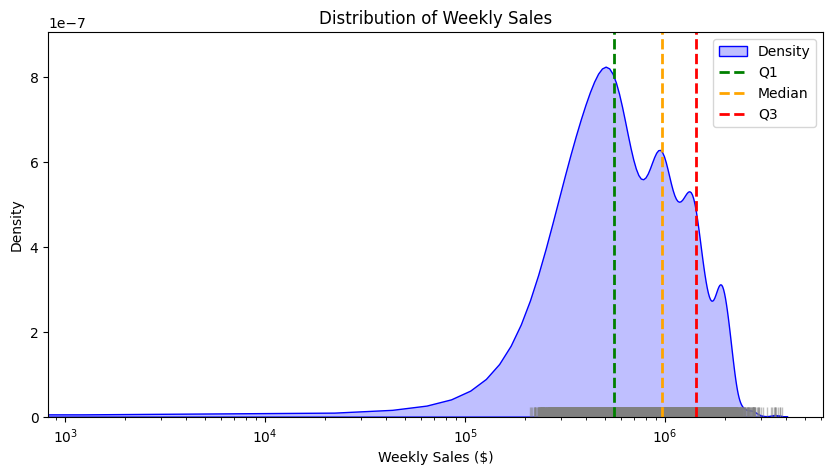

In [9]:
#Let us first analyze the distribution of the target variable

import seaborn as sns
import matplotlib.pyplot as plt

# Extract the target variable
target = 'Weekly_Sales'

# Create the plot
plt.figure(figsize=(10, 5))

# Kernel density estimation plot
sns.kdeplot(df[target], color='blue', shade=True, label='Density')

# Rugplot to show individual data points
sns.rugplot(df[target], color='gray', alpha=0.5)

# Quantile lines
plt.axvline(df[target].quantile(0.25), color='green', linestyle='dashed', linewidth=2, label='Q1')
plt.axvline(df[target].quantile(0.50), color='orange', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(df[target].quantile(0.75), color='red', linestyle='dashed', linewidth=2, label='Q3')

# Logarithmic x-axis
plt.xscale('log')

# Labels and title
plt.xlabel('Weekly Sales ($)')
plt.ylabel('Density')
plt.title('Distribution of Weekly Sales')
plt.legend()

# Show the plot
plt.show()


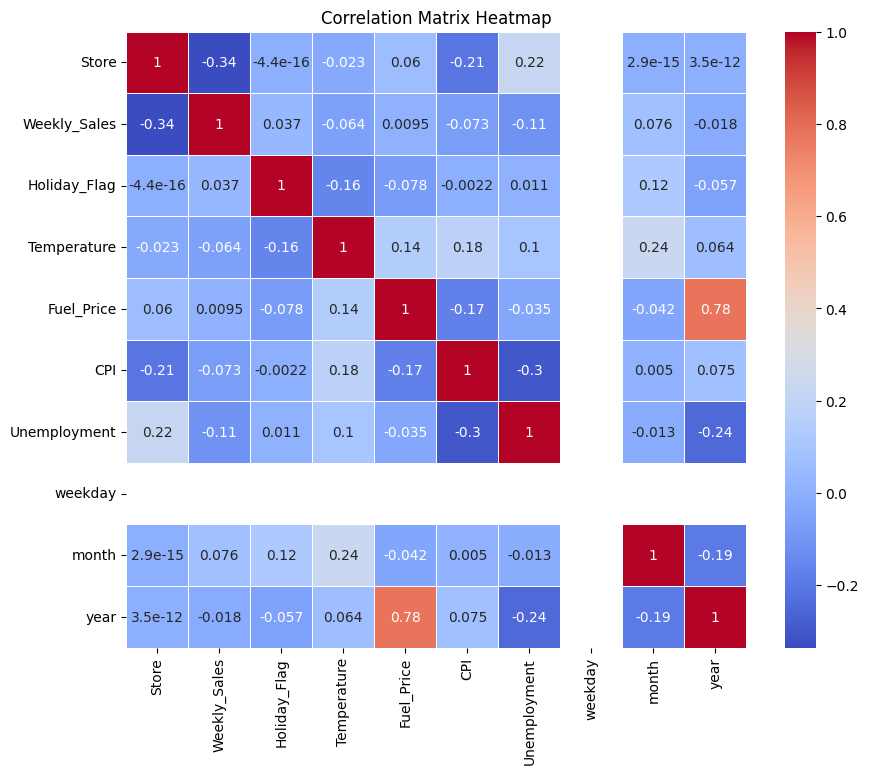

In [12]:
# Creating specific visualizations or correlation matrices to explore relationships between features of interest.
# This approach will provide a more focused and targeted analysis of the relationships between specific pairs of features,
# making it simpler and more efficient for our analysis.

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()



How Outliers Are Removed
Calculation of Quartiles: For each numerical feature (column) in the dataset:

Q1 (First Quartile): This is the value below which 25% of the data falls.
Q3 (Third Quartile): This is the value below which 75% of the data falls.
IQR (Interquartile Range): This is the range between Q3 and Q1 (i.e.,
IQR
=
𝑄
3
−
𝑄
1
IQR=Q3−Q1).
Determine Outlier Boundaries: Using the IQR, outlier boundaries are calculated:

Lower Bound:
𝑄
1
−
1.5
×
IQR
Q1−1.5×IQR
Upper Bound:
𝑄
3
+
1.5
×
IQR
Q3+1.5×IQR
Filter Data:

Keep Values: Only keep data points that lie within the bounds of the lower and upper boundaries.
Remove Outliers: Data points that fall outside these bounds are considered outliers and are removed from the DataFrame.

In [16]:
# Create a copy of the original dataframe and name it df_no_outliers_iqr
df_no_outliers_iqr = df3.copy()

# Define features for outlier removal
features1 = numerical_features

# Remove outliers using IQR method
for col in features1:
    # Calculate IQR more efficiently
    q1 = df_no_outliers_iqr[col].quantile(0.25)
    q3 = df_no_outliers_iqr[col].quantile(0.75)
    iqr = q3 - q1

    # Filter data within 1.5 IQR of quartiles
    df_no_outliers_iqr = df_no_outliers_iqr[df_no_outliers_iqr[col] <= (q3 + 1.5 * iqr)]
    df_no_outliers_iqr = df_no_outliers_iqr[df_no_outliers_iqr[col] >= (q1 - 1.5 * iqr)]

    # Reset index after each filtering
    df_no_outliers_iqr = df_no_outliers_iqr.reset_index(drop=True)

# Display the head of the processed dataset
display(df_no_outliers_iqr.head())

# Print informative messages about outlier removal
print("\n\033[1mInference:\033[0m\nBefore outlier removal, the dataset had {} samples.".format(df3.shape[0]))
print("After outlier removal, the dataset now has {} samples.".format(df_no_outliers_iqr.shape[0]))


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,2010



Inference:
Before outlier removal, the dataset had 6435 samples.
After outlier removal, the dataset now has 5951 samples.


PCA transforms the original feature space into a new space defined by principal components, which are the directions of maximum variance. This process involves standardizing the data, computing the covariance matrix, finding eigenvalues and eigenvectors, and using them to project the data onto a new set of axes. The principal components with the highest eigenvalues capture the most information (variance) from the original data, allowing for effective dimensionality reduction.

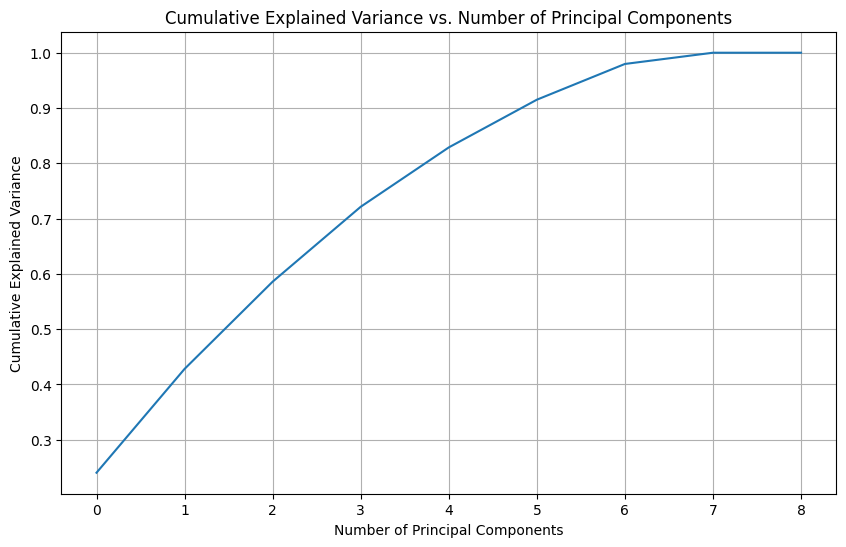

Number of components to retain 95.0% variance: 7
Selected features using RFE: Index(['Store', 'Holiday_Flag', 'Fuel_Price', 'month', 'year'], dtype='object')
Number of components to retain 95.0% variance: 7

Selected features using RFE: Index(['Store', 'Holiday_Flag', 'Fuel_Price', 'month', 'year'], dtype='object')

Summary:
For PCA Feature Reduction:
- Retaining 7 components to capture 95% of the variance.
For Recursive Feature Elimination (RFE):
- Selected features using RFE: Store, Holiday_Flag, Fuel_Price, month, year


In [17]:
# Note - defines 'Weekly_Sales' as the target variable and ensures it is not included in the PCA transformation or RFE feature selection.
# The target 'Weekly_Sales' is preserved throughout the process for subsequent modeling

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Assuming df_no_outliers_iqr is the dataframe after outlier removal
# Define the target variable explicitly
target = 'Weekly_Sales'

# Extract features and target variable
X = df_no_outliers_iqr.drop(target, axis=1)
y = df_no_outliers_iqr[target]

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Task 1: Code Review
# Creating and fitting the PCA object
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Task 2: Exploration of Explained Variance
# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

# Task 3: Threshold Adjustment
# Evaluate the explained variance ratio for each principal component
explained_variance_ratios = pca.explained_variance_ratio_

# Choose a threshold, e.g., 0.95 for retaining 95% of the variance
threshold = 0.95
cumulative_variance = 0
num_components_to_keep = 0

for i, explained_variance_ratio in enumerate(explained_variance_ratios):
    cumulative_variance += explained_variance_ratio
    if cumulative_variance >= threshold:
        num_components_to_keep = i + 1
        break

print(f"Number of components to retain {threshold * 100}% variance: {num_components_to_keep}")

# Retain only the selected number of components
pca = PCA(n_components=num_components_to_keep)
X_pca = pca.fit_transform(X_scaled)

# Task 4: Alternative Approaches
# Example of Recursive Feature Elimination (RFE)
# Create a linear regression model
model = LinearRegression()

# Create the RFE model and select the number of features to retain
num_features_to_retain = 5
rfe = RFE(model, n_features_to_select=num_features_to_retain)
X_rfe = rfe.fit_transform(X, y)  # Use X instead of X_pca
'''
Purpose: Uses RFE to select a subset of features. RFE works by fitting the model (in this case, LinearRegression) and
recursively removing the least important features.
The number of features to retain is specified (5 in this case).
The resulting selected features are displayed.
'''

# Display the selected features
selected_features = X.columns[rfe.support_]
print("Selected features using RFE:", selected_features)

print(f"Number of components to retain {threshold * 100}% variance: {num_components_to_keep}")
print("\nSelected features using RFE:", selected_features)

# Summary of PCA and RFE
print("\nSummary:")
print(f"For PCA Feature Reduction:\n- Retaining {num_components_to_keep} components to capture 95% of the variance.")
print(f"For Recursive Feature Elimination (RFE):\n- Selected features using RFE: {', '.join(selected_features)}")


In [18]:

# Print contributions of original features to each principal component
# Note: This does not include the target variable 'Weekly_Sales'
component_names = [f'PC{i+1}' for i in range(num_components_to_keep)]
components_df = pd.DataFrame(pca.components_, columns=X.columns, index=component_names)

# Display the DataFrame with feature contributions to each principal component
print("\nContributions of Original Features to Principal Components:")
print(components_df)

###Target Variable 'Weekly_Sales':
# The variable 'Weekly_Sales' is your target variable and is stored separately in y.
# It is not part of the PCA process which is applied to X, the feature set. Therefore, 'Weekly_Sales' is not affected by PCA and is not lost.
# PCA Components and Original Features:The PCA process transforms your original features into a set of principal components. These components are linear combinations of your original features. The components_ attribute of the PCA object shows how each original feature contributes to each principal component.
# Since 'Weekly_Sales' is not part of X, it will not be included in the PCA components and its contribution will not be shown in components_df.
# Displaying PCA Information: When you print the explained variance ratios and the contributions of original features to the principal components, you are essentially examining the new PCA-transformed feature space. This is separate from your target variable 'Weekly_Sales'.


Contributions of Original Features to Principal Components:
        Store  Holiday_Flag  Temperature  Fuel_Price       CPI  Unemployment  \
PC1  0.096023      0.142239    -0.170800   -0.620806 -0.099138      0.294810   
PC2 -0.546984      0.016267     0.219747   -0.273404  0.569120     -0.455392   
PC3 -0.251756      0.169311    -0.703570   -0.105726 -0.073329     -0.284987   
PC4 -0.018337      0.790928    -0.145346    0.173060 -0.162629     -0.161719   
PC5  0.373618      0.450351     0.106932   -0.076840  0.636993      0.280668   
PC6 -0.681262      0.229942     0.248010    0.124001 -0.171762      0.570191   
PC7 -0.152320     -0.262668    -0.574750    0.139020  0.403878      0.433923   

          weekday     month      year  
PC1  3.469447e-18  0.130229 -0.665037  
PC2  2.081668e-17  0.171341 -0.129878  
PC3 -2.220446e-16 -0.558754  0.054433  
PC4  5.842549e-15  0.511274  0.094967  
PC5  3.330669e-16 -0.363851  0.152747  
PC6  1.665335e-16 -0.226882  0.005306  
PC7 -2.220446e-16 

The snippet involves creating a DataFrame that shows the contribution of each original feature to the principal components derived from PCA. It clarifies that the target variable Weekly_Sales is not involved in PCA and hence does not affect or get affected by the PCA process. The DataFrame helps in understanding which features are influential in defining the principal components, providing insight into how the dimensionality reduction has transformed the dat

In [19]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Assuming df_no_outliers_iqr is the dataframe after outlier removal
# And PCA has been performed with df_no_outliers_iqr to create X_pca

# Combine PCA components with the target variable 'Weekly_Sales'
df_pca_features = pd.DataFrame(X_pca, index=df_no_outliers_iqr.index)
df_pca_imputed = pd.concat([df_pca_features, df_no_outliers_iqr[['Weekly_Sales']]], axis=1)

# 1. Missing Values Assessment for features (excluding 'Weekly_Sales')
# Identify columns with missing values in the features only
missing_value_mask = df_pca_imputed.drop('Weekly_Sales', axis=1).isnull().any()
features_with_missing_values = df_pca_imputed.drop('Weekly_Sales', axis=1).columns[missing_value_mask].tolist()

# Quantify the extent of missing data for each relevant feature
missing_values_summary = df_pca_imputed[features_with_missing_values].isnull().sum()
missing_values_percentage = (missing_values_summary / len(df_pca_imputed)) * 100

# Print missing values summary
print("\nFeatures with Missing Values:")
print(features_with_missing_values)
print("\nMissing Values Summary:")
print(missing_values_summary)
print("\nMissing Values Percentage:")
print(missing_values_percentage)

# 2. Imputation Techniques
# Create separate lists for numeric and non-numeric features, excluding 'Weekly_Sales'
numeric_features = df_pca_imputed.select_dtypes(include=['number']).columns.drop('Weekly_Sales').tolist()

# Imputation strategy for numeric features
numeric_imputation_strategy = 'mean'
numeric_imputer = SimpleImputer(strategy=numeric_imputation_strategy)

# Apply imputation only to numeric features, excluding 'Weekly_Sales'
df_pca_imputed[numeric_features] = numeric_imputer.fit_transform(df_pca_imputed[numeric_features])

# No non-numeric features to impute in this case

# 4. Model Training and Evaluation
# Define features (X) and target (y)
X = df_pca_imputed.drop('Weekly_Sales', axis=1)
y = df_pca_imputed['Weekly_Sales']

# Split the data
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_valid)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_valid, predictions)

# Print model performance
print("\nModel Performance After Imputation:")
print(f"MAE: {mae}")



Features with Missing Values:
[]

Missing Values Summary:
Series([], dtype: float64)

Missing Values Percentage:
Series([], dtype: float64)

Model Performance After Imputation:
MAE: 234580.15653986565


In [20]:
missing_value_mask

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False


In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score
from math import sqrt

# Assuming df_pca_imputed is the DataFrame after PCA and missing values imputation
# Use 'Weekly_Sales' as the target variable

# Split the data into features and target
X = df_pca_imputed.drop('Weekly_Sales', axis=1)
y = df_pca_imputed['Weekly_Sales']

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_valid)

# Calculate RMSE and R^2 on the test data
rmse_before_cv = sqrt(mean_squared_error(y_valid, y_pred))
r2_before_cv = r2_score(y_valid, y_pred)

# Perform cross-validation
# cv_results = cross_val_score(model, X, y, cv=5, scoring=make_scorer(mean_squared_error))
cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error))


# Calculate RMSE for each cross-validation fold
rmse_cv = [sqrt(score) for score in cv_results]

# Display results in a DataFrame
results_dict = {
    'Metric': ['RMSE Before CV', 'R2 Before CV', 'Mean RMSE CV', 'Std RMSE CV'],
    'Value': [rmse_before_cv, r2_before_cv, sum(rmse_cv)/len(rmse_cv), max(rmse_cv) - min(rmse_cv)]
}

results_df = pd.DataFrame(results_dict)

# Display the model evaluation results
print("\nModel Evaluation:")
print("Results Before Cross-Validation:")
print(f"RMSE: {rmse_before_cv}")
print(f"R2: {r2_before_cv}")
print("\nCross-Validation Results:")
print("Mean RMSE:", cv_results.mean())
print("Std RMSE:", cv_results.std())
print("\nConsolidated Results:")
print(results_df)




Model Evaluation:
Results Before Cross-Validation:
RMSE: 338838.4682397311
R2: 0.6732674398949623

Cross-Validation Results:
Mean RMSE: 125978592096.07231
Std RMSE: 11019844410.086437

Consolidated Results:
           Metric          Value
0  RMSE Before CV  338838.468240
1    R2 Before CV       0.673267
2    Mean RMSE CV  354599.285045
3     Std RMSE CV   39843.234774


In [22]:
# Check if 'Imputation' column exists in X_train and X_test, and remove it if present
if 'Imputation' in X_train.columns:
    X_train = X_train.drop('Imputation', axis=1)
if 'Imputation' in X_test.columns:
    X_test = X_test.drop('Imputation', axis=1)
if 'Imputation' in X_valid.columns:
    X_valid = X_valid.drop('Imputation', axis=1)

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    "n_estimators": [200],
    "max_depth": [8, 12, 16],
    "min_samples_split": [3, 5]
}

# Initialize GridSearchCV with RandomForestRegressor and the defined parameter grid
rf_cv = GridSearchCV(rf_model, param_grid=param_grid, verbose=3, cv=3, n_jobs=-1, scoring='r2')

# Fit GridSearchCV to the training data
rf_cv.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", rf_cv.best_params_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters: {'max_depth': 16, 'min_samples_split': 3, 'n_estimators': 200}


In [25]:
 #Replace with actual best parameters if they are different
best_params = rf_cv.best_params_  # Example: {'max_depth': 16, 'min_samples_split': 3, 'n_estimators': 400}

# Initialize the RandomForestRegressor with the best parameters
rf_model = RandomForestRegressor(**best_params)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Evaluate the model's performance on training and test sets
training_r2 = rf_model.score(X_train, y_train)
test_r2 = rf_model.score(X_valid, y_valid)

# Print the R² scores
print(f"Training R²: {training_r2:.4f}")
print(f"Valid R²: {test_r2:.4f}")


Training R²: 0.9198
Valid R²: 0.6646


In [26]:
# GradientBoos hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
param_grid = {"n_estimators":[300, 500],
             "max_depth":[8,12, 16],
             "min_samples_split":[3, 5],
              "subsample" :[0.8,0.9],
             "learning_rate":[0.05, 0.1],
              }
gb_model = GradientBoostingRegressor()
gb_cv = GridSearchCV(gb_model, param_grid = param_grid, verbose = 3)
gb_cv.fit(X_train, y_train)
print(gb_cv.best_params_)
# n_estimator = 1000 min_sample_split = 4
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators = 500, max_depth = 16, subsample = 0.8, learning_rate = 0.05, min_samples_split = 5 )
gb_model.fit(X_train,y_train)
print(f"Training r^2: {gb_model.score(X_train,y_train):.4f}")
print(f"Valid r^2: {gb_model.score(X_valid,y_valid):.4f}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=300, subsample=0.8;, score=0.587 total time=   8.9s
[CV 2/5] END learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=300, subsample=0.8;, score=0.596 total time=   6.3s
[CV 3/5] END learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=300, subsample=0.8;, score=0.614 total time=   6.5s
[CV 4/5] END learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=300, subsample=0.8;, score=0.551 total time=   6.1s
[CV 5/5] END learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=300, subsample=0.8;, score=0.587 total time=   6.8s
[CV 1/5] END learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=300, subsample=0.9;, score=0.579 total time=   6.8s
[CV 2/5] END learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=300, subsample=0.9;, score=0.597 total time=   7.6s
[CV 3/5] END l

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Assuming df_no_outliers_iqr is your cleaned DataFrame with 'Weekly_Sales' as the target variable
target = 'Weekly_Sales'
X = df_no_outliers_iqr.drop(target, axis=1)
y = df_no_outliers_iqr[target]

# 1. Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 3. Determine number of components to retain 95% variance
threshold = 0.95
cumulative_variance = 0
num_components_to_keep = 0

explained_variance_ratios = pca.explained_variance_ratio_
for i, explained_variance_ratio in enumerate(explained_variance_ratios):
    cumulative_variance += explained_variance_ratio
    if cumulative_variance >= threshold:
        num_components_to_keep = i + 1
        break

# Retain only the selected number of components
pca = PCA(n_components=num_components_to_keep)
X_pca = pca.fit_transform(X_scaled)

# 4. Train a Random Forest Regressor
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Optional: Evaluate model performance on test set
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"Model Performance (MAE): {mae}")

# Now define your custom input data for prediction
custom_input_data = {
    'Store': [1],  # Example Store number
    'Holiday_Flag': [0],  # Example holiday flag
    'Temperature': [46.50],  # Example temperature
    'Fuel_Price': [2.625],  # Example fuel price
    'CPI': [211.350143],  # Example CPI
    'Unemployment': [8.106],  # Example unemployment rate
    'weekday': [4],  # Example weekday (0=Sunday, 6=Saturday)
    'month': [3],  # Example month (3=March)
    'year': [2010]  # Example year
}

# Step 1: Create a DataFrame from the custom input
input_df = pd.DataFrame(custom_input_data)

# Step 2: Standardize the input data using the fitted scaler
input_df_scaled = scaler.transform(input_df)

# Step 3: Transform the standardized data using the fitted PCA
input_df_pca = pca.transform(input_df_scaled)

# Step 4: Make a prediction using the pre-trained Random Forest model
predicted_sales = model.predict(input_df_pca)

# Output the prediction
print(f"Predicted Weekly Sales: {predicted_sales[0]}")


Model Performance (MAE): 237083.9010871221
Predicted Weekly Sales: 1589576.5663000024


In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import pickle

# Load your data
# df_no_outliers_iqr = pd.read_csv('your_data.csv') # Example for loading data

# Assuming df_no_outliers_iqr is your cleaned DataFrame with 'Weekly_Sales' as the target variable
target = 'Weekly_Sales'
X = df_no_outliers_iqr.drop(target, axis=1)
y = df_no_outliers_iqr[target]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Determine number of components to retain 95% variance
threshold = 0.95
cumulative_variance = 0
num_components_to_keep = 0

explained_variance_ratios = pca.explained_variance_ratio_
for i, explained_variance_ratio in enumerate(explained_variance_ratios):
    cumulative_variance += explained_variance_ratio
    if cumulative_variance >= threshold:
        num_components_to_keep = i + 1
        break

# Retain only the selected number of components
pca = PCA(n_components=num_components_to_keep)
X_pca = pca.fit_transform(X_scaled)

# Train a Random Forest Regressor
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Save the scaler, PCA, and model to files
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('pca.pkl', 'wb') as pca_file:
    pickle.dump(pca, pca_file)

with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

print("Scaler, PCA, and Model have been saved successfully.")

# Load the scaler, PCA, and model from files for prediction
with open('scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

with open('pca.pkl', 'rb') as pca_file:
    loaded_pca = pickle.load(pca_file)

with open('model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

print("Scaler, PCA, and Model have been loaded successfully.")

# Example of making a prediction with custom input after loading
custom_input_data = {
    'Store': [1],
    'Holiday_Flag': [0],
    'Temperature': [46.50],
    'Fuel_Price': [2.625],
    'CPI': [211.350143],
    'Unemployment': [8.106],
    'weekday': [4],
    'month': [3],
    'year': [2010]
}

# Step 1: Create a DataFrame from the custom input
input_df = pd.DataFrame(custom_input_data)

# Step 2: Standardize the input data using the fitted scaler
input_df_scaled = loaded_scaler.transform(input_df)

# Step 3: Transform the standardized data using the fitted PCA
input_df_pca = loaded_pca.transform(input_df_scaled)

# Step 4: Make a prediction using the pre-trained Random Forest model
predicted_sales = loaded_model.predict(input_df_pca)

# Output the prediction
print(f"Predicted Weekly Sales: {predicted_sales[0]}")


Scaler, PCA, and Model have been saved successfully.
Scaler, PCA, and Model have been loaded successfully.
Predicted Weekly Sales: 1589576.5663000024


In [40]:
# Save the trained model using pickle
with open('gradient_boosting_model.pkl', 'wb') as model_file:
    pickle.dump(gb_model, model_file)


In [43]:
import pandas as pd
import pickle

# Load the scaler, PCA, and model from files for prediction
with open('scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

with open('pca.pkl', 'rb') as pca_file:
    loaded_pca = pickle.load(pca_file)

with open('model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

print("Scaler, PCA, and Model have been loaded successfully.")

# Define custom input data (ensure all features are included)
custom_input_data = {
    'Store': [1],
    'Holiday_Flag': [0],
    'Temperature': [46.50],
    'Fuel_Price': [2.625],
    'CPI': [211.350143],
    'Unemployment': [8.106],
    'weekday': [4],  # Example: 0 = Sunday, 1 = Monday, ..., 6 = Saturday
    'month': [3],
    'year': [2010]
}

# Step 1: Create a DataFrame from the custom input
input_df = pd.DataFrame(custom_input_data)

# Step 2: Standardize the input data using the fitted scaler
input_df_scaled = loaded_scaler.transform(input_df)

# Step 3: Transform the standardized data using the fitted PCA
input_df_pca = loaded_pca.transform(input_df_scaled)

# Step 4: Make a prediction using the pre-trained Random Forest model
predicted_sales = loaded_model.predict(input_df_pca)

# Output the prediction
print(f"Predicted Weekly Sales: {predicted_sales[0]}")


Scaler, PCA, and Model have been loaded successfully.
Predicted Weekly Sales: 1589576.5663000024


In [44]:
scikit-learn --version

NameError: name 'scikit' is not defined

In [45]:
import sklearn
print(sklearn.__version__)


1.3.2
